In [1]:
# pip install tensorflow         # для 2-ї версії
# pip install tensorflow==1.15.5 # для 1-ї версії

In [2]:
import tensorflow as tf

In [3]:
hello = tf.constant('Hello, World!')
print(hello)

tf.Tensor(b'Hello, World!', shape=(), dtype=string)


In [4]:
import tensorflow.compat.v1 as tfc
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tfc.disable_eager_execution()

In [6]:
zeros_tensor = tf.zeros([3, 3])
print(zeros_tensor)

Tensor("zeros:0", shape=(3, 3), dtype=float32)


In [7]:
zeros_tensor

<tf.Tensor 'zeros:0' shape=(3, 3) dtype=float32>

In [8]:
a = tfc.truncated_normal([2, 2])
b = tf.fill([2, 2], 0.5)
print(a + b)
print(a - b)
print(a * b)
print(tf.matmul(a, b))

Tensor("add:0", shape=(2, 2), dtype=float32)
Tensor("sub:0", shape=(2, 2), dtype=float32)
Tensor("mul:0", shape=(2, 2), dtype=float32)
Tensor("MatMul:0", shape=(2, 2), dtype=float32)


In [9]:
basic_tensor = tf.constant([[10,11],[12,13]])
print(basic_tensor)

Tensor("Const:0", shape=(2, 2), dtype=int32)


In [10]:
print(basic_tensor + 10)
print(basic_tensor - 10)
print(basic_tensor * 10)
print(basic_tensor / 10)

Tensor("add_1:0", shape=(2, 2), dtype=int32)
Tensor("sub_1:0", shape=(2, 2), dtype=int32)
Tensor("mul_1:0", shape=(2, 2), dtype=int32)
Tensor("truediv:0", shape=(2, 2), dtype=float64)


In [11]:
tensor_1 = tf.constant([[2,2],[4,4]])
tensor_2 = tf.constant([[2,3],[4,5]])

In [12]:
print(tf.matmul(tensor_1,tensor_2))

Tensor("MatMul_1:0", shape=(2, 2), dtype=int32)


In [13]:
print(tf.reshape(tensor_1,[4,1]))

Tensor("Reshape:0", shape=(4, 1), dtype=int32)


In [14]:
print(tf.transpose(tensor_1))

Tensor("transpose:0", shape=(2, 2), dtype=int32)


In [15]:
# Generating random linear data
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)
 
# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

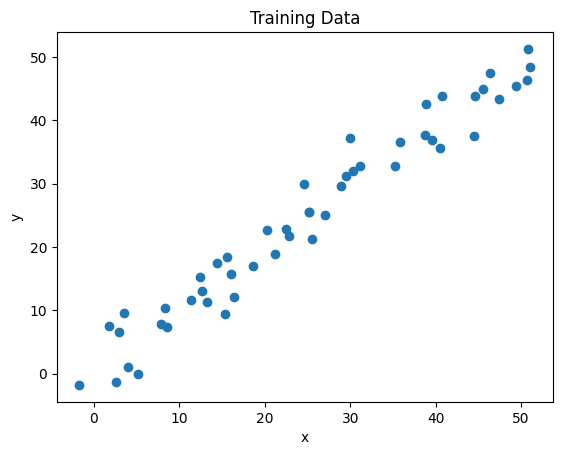

In [16]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [17]:
X = tfc.placeholder("float")
Y = tfc.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [18]:
learning_rate = 0.01
training_epochs = 1000

In [19]:
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)
 
# MSE cost function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x))
 
# Gradient Descent Optimizer
optimizer_gradient = tfc.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
# Global variables
init = tfc.global_variables_initializer()

In [20]:
# Starting the Tensorflow Session
with tfc.Session() as sess:
     
    # Initializing the Variables
    sess.run(init)
     
    # Iterating through all the epochs
    for epoch in range(training_epochs):
         
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer_gradient, feed_dict = {X : _x, Y : _y})
         
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 5.4930553 W = 0.9723895 b = -0.678189
Epoch 100 : cost = 5.3714423 W = 0.9683847 b = -0.47615108
Epoch 150 : cost = 5.2746778 W = 0.9648055 b = -0.29558578
Epoch 200 : cost = 5.197721 W = 0.9616067 b = -0.13421074
Epoch 250 : cost = 5.1365514 W = 0.9587478 b = 0.010013734
Epoch 300 : cost = 5.087957 W = 0.9561928 b = 0.13891044
Epoch 350 : cost = 5.049381 W = 0.95390934 b = 0.25410834
Epoch 400 : cost = 5.018781 W = 0.95186853 b = 0.35706285
Epoch 450 : cost = 4.9945297 W = 0.9500446 b = 0.449077
Epoch 500 : cost = 4.975328 W = 0.94841456 b = 0.5313107
Epoch 550 : cost = 4.960144 W = 0.9469577 b = 0.60480577
Epoch 600 : cost = 4.9481497 W = 0.94565576 b = 0.6704893
Epoch 650 : cost = 4.938692 W = 0.9444921 b = 0.7291924
Epoch 700 : cost = 4.9312468 W = 0.9434522 b = 0.7816551
Epoch 750 : cost = 4.9253936 W = 0.94252276 b = 0.8285443
Epoch 800 : cost = 4.9208074 W = 0.94169205 b = 0.87045056
Epoch 850 : cost = 4.91722 W = 0.94094974 b = 0.9079014
Epoch 900 : cost = 4.9

In [21]:
predictions = weight * x + bias
print("Training cost =", 
      training_cost, 
      "Weight =", weight, 
      "bias =", bias, '\n')

Training cost = 4.910574 Weight = 0.9391633 bias = 0.99802184 



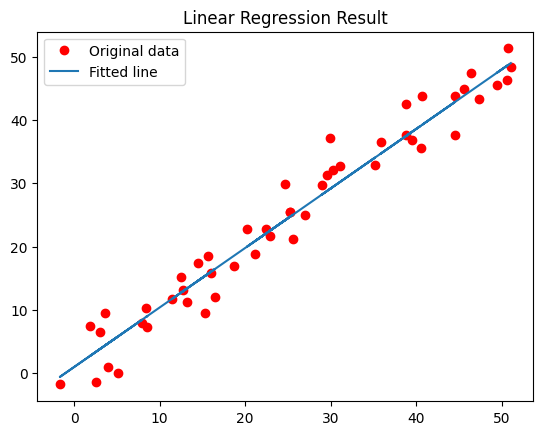

In [22]:
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

___